In [1]:
import sys
sys.path.append('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/')

import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Hyperparam_Testing.Testing_Notebooks.Common_Functions as cf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import os
from keras.regularizers import l2
import Hyperparam_Testing.Testing_Notebooks.chirallag as cL

import matplotlib
matplotlib.rcParamsDefault

matplotlib.rcParams.update({'font.size': 16})


In [2]:
data = cf.gen_and_load(1000000,100000)
train_x ,train_y = data[0]
val_x,val_y = data[1]

In [3]:
model = models.load_model('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Hyperparam_Testing/Testing_Notebooks/Optimised_Network/5_107.0datapoints.h5')
v_nn = model.predict(train_x)[:,0]

2022-02-14 09:58:26.125022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-14 09:58:26.129110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-14 09:58:26.129393: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-14 09:58:26.129950: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Text(0.5, 0, '$V(\\phi)$')

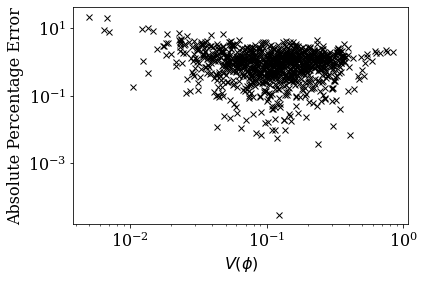

In [88]:
ape = abs((v_nn-train_y)/train_y)


fig , ax = plt.subplots(1)
ax.loglog(train_y[:10**3],ape[:10**3]*100, marker = 'x', c = 'black',linestyle = '')
ax.set_ylabel('Absolute Percentage Error')
ax.set_xlabel('$V(\phi)$')



In [48]:
cutoff = 0.25
fraction  = len(np.where(train_y>cutoff)[0])
print('Fraction of Data with $V(\phi)>{}$ = {}'.format(cutoff,fraction/train_y.shape[0]))

Fraction of Data with $V(\phi)>0.25$ = 0.12285666666666667


In [49]:
cutoffs = np.linspace(0,1,100)
fraction_mape = []
for i in cutoffs:
    index = np.where(train_y>i)
    fraction_mape.append(np.mean(abs((v_nn[index]-train_y[index])/train_y[index]))*100)

In [62]:
fractions = []
for i in cutoffs:
    fraction = len(train_y[np.where(train_y>i)])/train_y.shape[0]
    fractions.append(fraction)

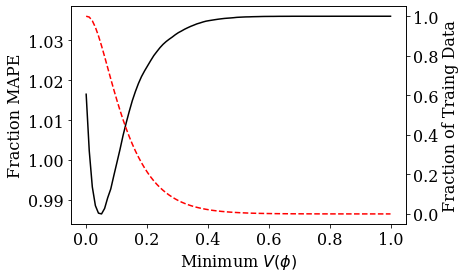

In [66]:
fig, ax = plt.subplots(1)
ax2 = ax.twinx()
ax2.plot(cutoffs,fractions, 'r--')
ax.plot(cutoffs,fraction_mape, c = 'black')
ax.set_ylabel('Fraction MAPE')
ax.set_xlabel('Minimum $V(\phi)$')
ax2.set_ylabel('Fraction of Traing Data')
best_cut = float(cutoffs[np.argmin(fraction_mape)])


In [74]:
Upper_cut = np.linspace(best_cut+0.02,1.4,100)
train_y_2 = train_y[np.where(train_y>best_cut)]
v_nn_2 = v_nn[np.where(train_y>best_cut)]
fraction_mape = []
fractions = []
for i in Upper_cut:
    index = [train_y_2<i]
    fractions.append(len(train_y_2[index])/train_y.shape[0])  
    fraction_mape.append(np.mean(abs((v_nn_2[index]-train_y_2[index])/train_y_2[index]))*100)

/tmp/ipykernel_14590/420550681.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  fractions.append(len(train_y_2[index])/train_y.shape[0])
/tmp/ipykernel_14590/420550681.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  fraction_mape.append(np.mean(abs((v_nn_2[index]-train_y_2[index])/train_y_2[index]))*100)


In [75]:
fraction_mape =np.nan_to_num(fraction_mape,0)

Text(0.5, 0, '0.101< $V(\\phi)< x $')

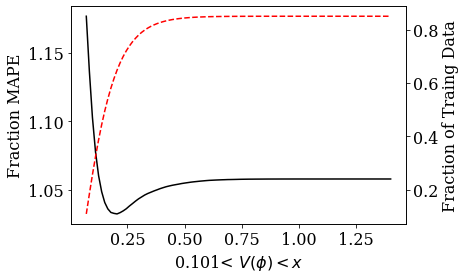

In [79]:
fig, ax = plt.subplots(1)
ax2 = ax.twinx()
ax2.plot(Upper_cut,fractions, 'r--')
ax.plot(Upper_cut,fraction_mape,c = 'black')
ax.set_ylabel('Fraction MAPE')
ax2.set_ylabel('Fraction of Traing Data')
ax.set_xlabel('{}< $V(\phi)< x $'.format(round(best_cut+0.05,3)))


In [80]:
optimum_cut = round(Upper_cut[np.argmin(fraction_mape)],2)
print('Optimised MAPE on the interval $0.2<V(\phi)<{}$'.format(optimum_cut))
optimum_fraction = len(train_y[np.where(train_y_2<optimum_cut)])/train_y.shape[0]
print('Fraction of the data in optimum interval = {}'.format(optimum_fraction))

Optimised MAPE on the interval $0.2<V(\phi)<0.2$
Fraction of the data in optimum interval = 0.6374033333333333


In [93]:
std = np.std(train_x[:,:8],axis = 1)
std.shape

(900000,)

Text(0, 0.5, 'Absolute Percentage Error')

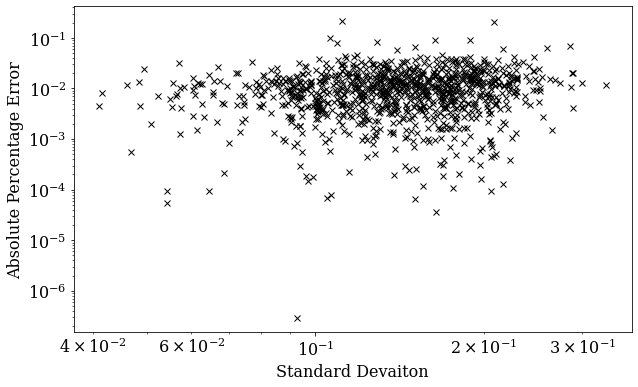

In [95]:
fig , ax = plt.subplots(1,figsize =(10,6))
ax.loglog(std[:10**3],ape[:10**3],linestyle = '', marker = 'x', c = 'black')
ax.set_xlabel('Standard Devaiton')
ax.set_ylabel('Absolute Percentage Error')


Suggests stadard deviaiton and APE have no correlation. which is frankly annoying. 

In [89]:
train_x[0]

array([0.99230251, 0.98674835, 0.96953178, 0.81819277, 0.98738366,
       0.81438296, 0.60720767, 0.68228494, 0.29516815, 0.84868779,
       0.94966986, 0.51554766, 0.62912792, 0.95399949, 0.99894616,
       0.97157671])